In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import sys, os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Add some fine-tuning specific functions
from functions.generation_functions import *
from functions.dataset_creation_functions import *
from functions.evaluation_functions import *

# Initialization

In [2]:
# Specify models that we will test for (SFT models)
model_eval_list = ['models/llama-3.2-3b-instruct-SFT-val_test_10_15-merged']

# Specify base information needed for some model functions
variables = ['asthma', 'smoking', 'pneu', 'common_cold', 'pain', 'fever', 'antibiotics']
json_template = {
        "asthma": "yes|no",
        "smoking": "yes|no",
        "pneu": "yes|no",            
        "common_cold": "yes|no",
        "pain": "yes|no",
        "fever": "high|low|no",
        "antibiotics": "yes|no"}
features = json_template.keys()

# Iterate Though Evaluations We Want to Perform


Overall weighted F1 (across features): 0.6753


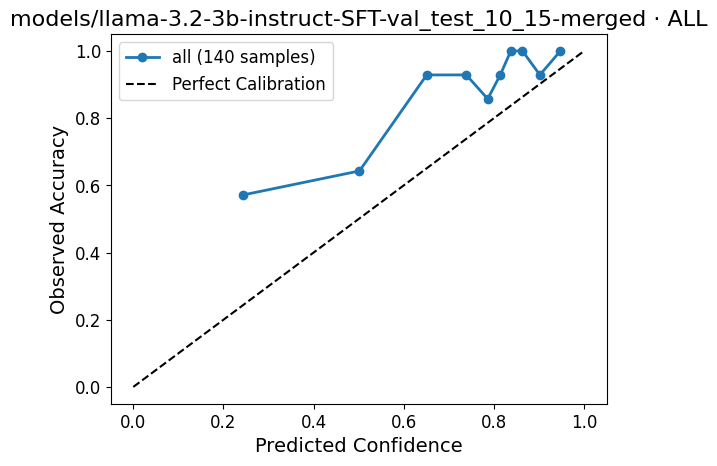

In [3]:
# Iterate Though Our Models
for model_name in model_eval_list:
    # Load in the Location Where Stuff is Saved 
    LOAD_LOC = f'results_data/CeRTS_SimSUM_20_test_val_{model_name.split("/")[1]}.csv'
    df = pd.read_csv(LOAD_LOC)
    
    ### Do the fever_df thing?
    fever_df = df[~df['LLM_fever'].isin(['high', 'low', 'no'])]
    
    # Get Numeric Metrocs
    metrics_df, overall_weighted_f1 = compute_metrics_strict_macro(df)
    metrics_df.to_csv(f'results_data/eval_results/SimSUM_classification_performance_{model_name.split("/")[1]}.csv')
    # print(metrics_df.to_string())
    print("\nOverall weighted F1 (across features):", round(overall_weighted_f1, 4))

    # Perform Calibration
    calib_df = compute_calibration_and_brier(df, model_name=model_name, outdir="results_data/SimSUM_calibration_plots", num_bins=10)
    calib_df.to_csv(f'results_data/eval_results/SimSUM_calibration_performance_{model_name.split("/")[1]}.csv')